<a href="https://colab.research.google.com/github/shvnshnn02/PCVK_Ganjil_2023/blob/main/Week_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 5:**

Agung Malik Al Qindy / 2141720114

Billie Faiqul Izzat / 214172020051

Shovinas Hanun / 2141720252

1. Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:


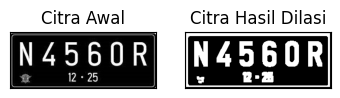

In [3]:
def dilasi_citra(F, k):
    # Ukuran citra
    m, n = F.shape

    #Generate structure element dilasi (SED)
    SE = np.ones((k, k), dtype=np.uint8)
    constant = (k - 1) // 2
    imgD = np.zeros((m, n), dtype=np.uint8)

    # Proses Dilasi
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            # Dilasi dilakukan dengan mengambil nilai maksimum di bawah SED
            imgD[i, j] = np.max(temp)

    return imgD

img_d = cv2.imread('/content/drive/MyDrive/plat nomer.jpg', 0)

ret1, thresh1 = cv2.threshold(img_d, 175, 225, cv2.THRESH_BINARY)
k = 5
imgD = dilasi_citra(thresh1, k)

plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:


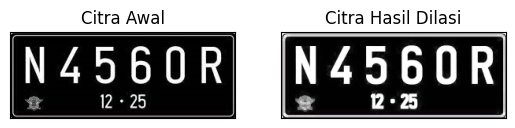

In [4]:
img = cv2.imread('/content/drive/MyDrive/plat nomer.jpg')

kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(img, kernel, iterations = 1)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilated), plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:


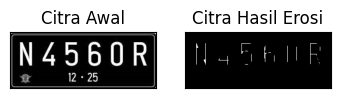

In [5]:
#Erosi Tanpa Library
def erosi_citra(F, k):
  #size image
  m, n = F.shape

  #Generate structure element erosi (SE)
  SE = np.ones((k, k), dtype = np.uint8)
  constant = (k-1)//2
  imgE = np.zeros((m,n), dtype = np.uint8)

  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
      product = temp * SE
      imgE[i,j] = np.min(product)

  return imgE

img_e = cv2.imread('/content/drive/MyDrive/plat nomer.jpg',0)

ret1, thresh1 = cv2.threshold(img_e, 175, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131), plt.imshow(img_e, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini:

(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

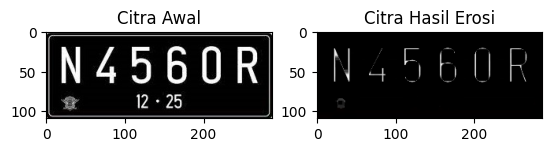

In [6]:
kernel = np.ones((5,5), np.uint8)
erosion = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:
Operasi Opening Menggunakan tanpa Library Morphology

<ipython-input-7-0cdfcf95e761>:52: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

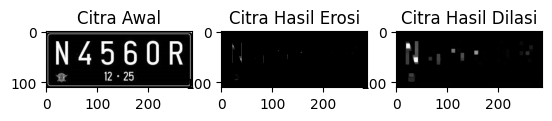

In [7]:
# 7. program implementasi operasi opening dengan Structuring Element berbentuk square 7 x 7
# tanpa menggunakan library morphology dari openCV

# Membaca image untuk operasi erosi
img7 = cv2.imread('/content/drive/MyDrive/plat nomer.jpg', 0)

#Acquire size of the image
m, n = img7.shape

#Show the image
plt.imshow(img7, cmap="gray")

# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k = 7
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
imgErode = np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant): #constant adalah tipe variable yang nilainya tidak dapat diubah
  for j in range(constant,n-constant):
    temp = img7[i-constant:i+constant+1, j-constant:j+constant+1] #temp digunakan untuk menampung atau menyimpan data untuk sementara
    product = temp * SE
    imgErode[i,j] = np.min(product)

#Read the image for dilation
img7_2 = imgErode

#Acquire size of the image
p, q= img7_2.shape

#Show the image
plt.imshow(img7_2, cmap="gray")

#Define new image to store the pixels of dilated image
imgDilate = np.zeros((p,q), dtype=np.uint8)

#Define the structuring element
SED = np.array([[1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1]])
constant1 = 3

#Dilation operation without using inbuilt cv2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img7_2[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

plt.subplot(131),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Erosi')
plt.subplot(133),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Dilasi')

(<Axes: title={'center': 'Citra Hasil Opening'}>,
 Text(0.5, 1.0, 'Citra Hasil Opening'))

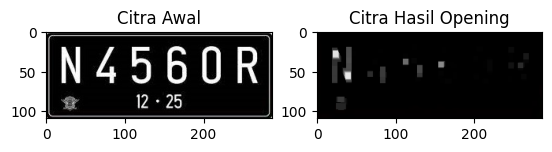

In [8]:
# 7. program implementasi operasi opening dengan Structuring Element berbentuk square 7 x 7
# dengan menggunakan library morphology dari openCV

kernel = np.ones((7,7), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(opening), plt.title('Citra Hasil Opening')


8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:
operasi closing tanpa library morphology

<ipython-input-9-c782711db555>:49: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img8, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

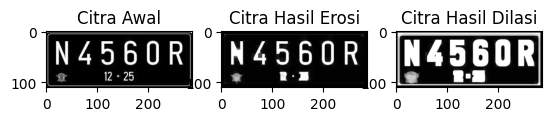

In [9]:
#Read the image for dilation
img8 = cv2.imread('/content/drive/MyDrive/plat nomer.jpg', 0)

#Acquire size of the image
p, q = img8.shape

#Show the image
plt.imshow(img8, cmap="gray")

#Define new image to store the pixels of dilated image
imgDilate = np.zeros((p,q), dtype=np.uint8)

#Define the structuring element
SED = np.array([[1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1]])
constant1 = 3

#Dilation operation without using inbuilt CV2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img8[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

#Read the image for erosion
img8_2 = imgDilate

#Acquire size of the image
m, n= img8_2.shape

#Show the image
plt.imshow(img8_2, cmap="gray")

# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k = 7
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
imgErode = np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp = img8_2[i-constant:i+constant+1, j-constant:j+constant+1]
    product = temp * SE
    imgErode[i,j] = np.min(product)

plt.subplot(131),plt.imshow(img8, cmap="gray"),plt.title('Citra Awal')
plt.subplot(133),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Dilasi')
plt.subplot(132),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Erosi')

(<Axes: title={'center': 'Citra Hasil Closing'}>,
 Text(0.5, 1.0, 'Citra Hasil Closing'))

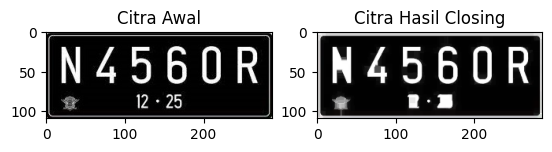

In [10]:
# 8. implementasi operasi closing dengan Structuring Element berbentuk square 7 x 7
# dengan menggunakan library morphology dari openCV

kernel = np.ones((7,7), np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(closing), plt.title('Citra Hasil Closing')

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

SED = Cross 3


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

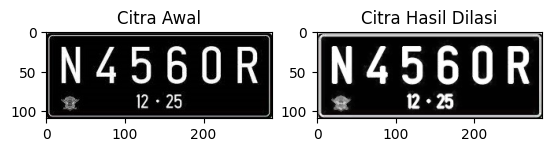

In [11]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
dilation = cv2.dilate(img, kernel, iterations = 1)

print("SED = Cross 3")

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

SED = Cross 5


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

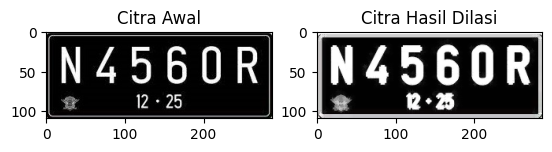

In [12]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
dilation = cv2.dilate(img, kernel, iterations = 1)

print("SED = Cross 5")

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:


SED = Circle 3


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

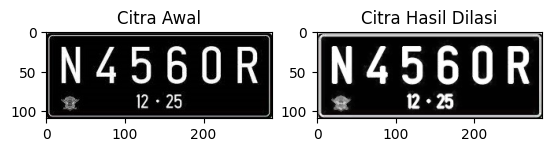

In [13]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
dilation = cv2.dilate(img, kernel, iterations = 1)

print("SED = Circle 3")

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')


SED = Circle 5


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

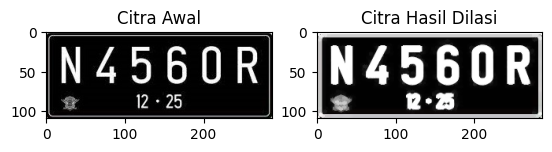

In [14]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dilation = cv2.dilate(img, kernel, iterations = 1)

print("SED = Circle 5")

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:

SE = Rectangle 3x5


(<Axes: title={'center': 'Citra HasilErosi'}>,
 Text(0.5, 1.0, 'Citra HasilErosi'))

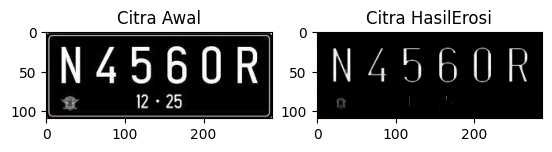

In [15]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,5))
erosion = cv2.erode(img, kernel, iterations = 1)

print("SE = Rectangle 3x5")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra HasilErosi')

SE = Rectangle 5x7


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

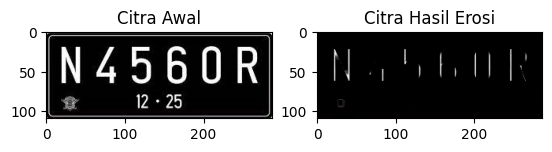

In [16]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,7))
erosion = cv2.erode(img, kernel, iterations = 1)

print("SE = Rectangle 5x7")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

SE = Line Vertikal 3


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

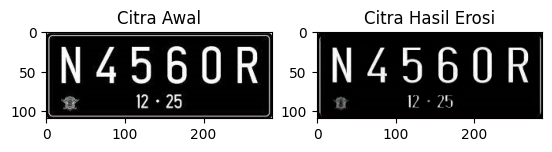

In [17]:
kernel = np.ones((3,1),np.uint8)
erosion = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)

print("SE = Line Vertikal 3")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

SE = Line Vertikal 5


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

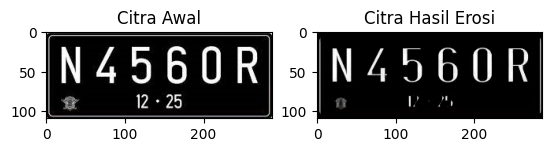

In [18]:
kernel = np.ones((5,1),np.uint8)
erosion = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)

print("SE = Line Vertikal 5")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

**13 TopHat**

(<Axes: title={'center': 'Top Hat'}>,
 Text(0.5, 1.0, 'Top Hat'),
 <matplotlib.image.AxesImage at 0x7c3624c49d20>)

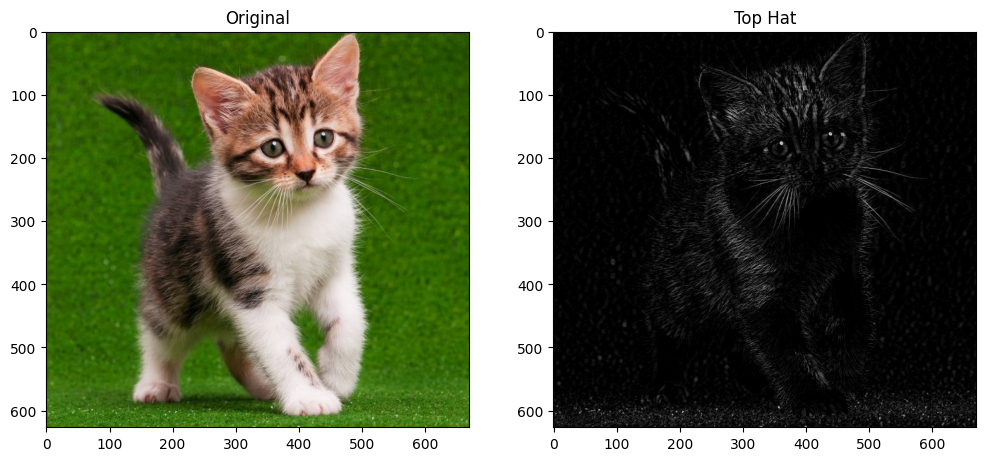

In [19]:
image = cv2.imread('/content/drive/MyDrive/kitten01.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.title("Original"), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2), plt.title("Top Hat"), plt.imshow(tophat, cmap='gray')

***14 BLACKHAT ***


(<Axes: title={'center': 'Black Hat'}>,
 Text(0.5, 1.0, 'Black Hat'),
 <matplotlib.image.AxesImage at 0x7c3624c1d900>)

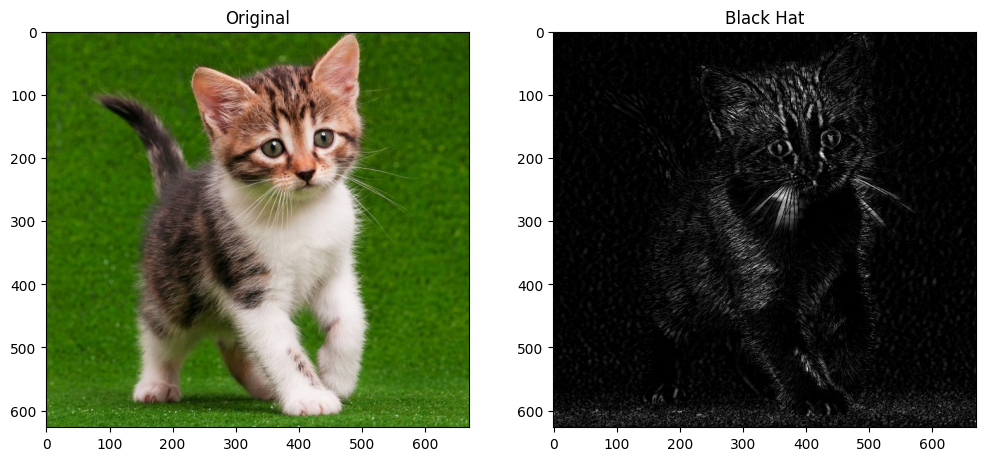

In [20]:
image = cv2.imread('/content/drive/MyDrive/kitten01.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.title("Original"), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2), plt.title("Black Hat"), plt.imshow(blackhat, cmap='gray')

**15. Skeleton **

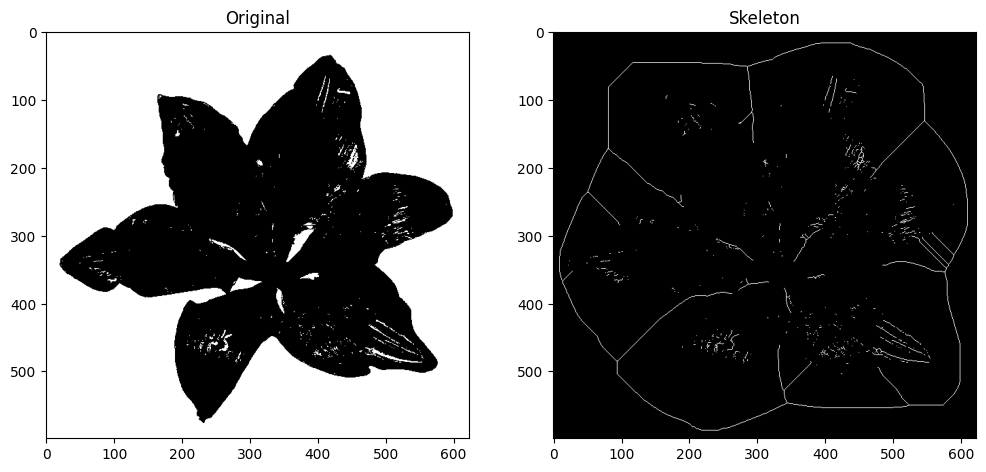

In [21]:
from skimage.morphology import skeletonize

image = cv2.imread('/content/drive/MyDrive/lily.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Thresholding gambar
_, binary_image = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
# Konversi gambar biner menjadi hanya 0 dan 1
binary_image[binary_image == 255] = 1
# Lakukan operasi teknik skeleton
skeleton = skeletonize(binary_image)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.title("Original"), plt.imshow(binary_image, cmap='gray')
plt.subplot(1, 2, 2), plt.title("Skeleton"), plt.imshow(skeleton, cmap='gray')
plt.show()

**16. Skeleton Inverse **


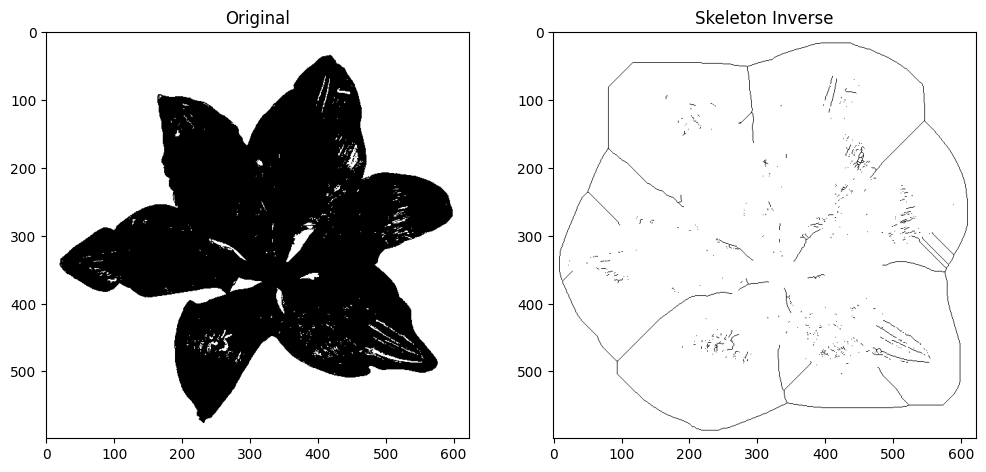

In [22]:
image = cv2.imread('/content/drive/MyDrive/lily.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Thresholding gambar
_, binary_image = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
# Konversi gambar biner menjadi hanya 0 dan 1
binary_image[binary_image == 255] = 1
# Lakukan operasi teknik skeleton
skeleton = skeletonize(binary_image)
# Lakukan operasi "Skeleton Inverse" (invers dari hasil teknik skeleton)
skeleton_inverse = np.logical_not(skeleton)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.title("Original"), plt.imshow(binary_image, cmap='gray')
plt.subplot(1, 2, 2), plt.title("Skeleton Inverse"), plt.imshow(skeleton_inverse, cmap='gray')
plt.show()

***17. Thickening ***


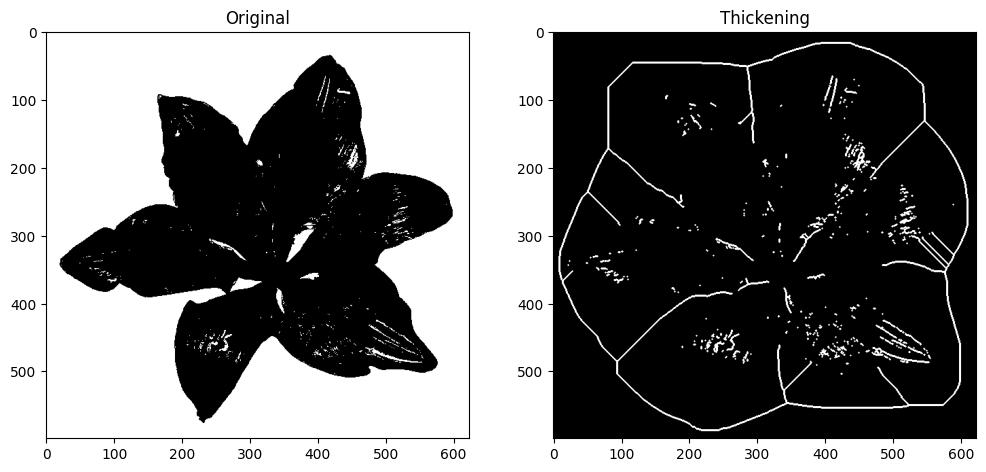

In [23]:
from skimage.morphology import binary_erosion, binary_dilation, disk

image = cv2.imread('/content/drive/MyDrive/lily.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Thresholding gambar
_, binary_image = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
# Konversi gambar biner menjadi hanya 0 dan 1
binary_image[binary_image == 255] = 1
# Lakukan operasi teknik skeleton
skeleton = skeletonize(binary_image)
# Lakukan operasi "Thickening" (perlebaran)
kernel = disk(1)  # Ukuran kernel untuk dilasi
thickening = binary_dilation(skeleton, footprint=kernel)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.title("Original"), plt.imshow(binary_image, cmap='gray')
plt.subplot(1, 2, 2), plt.title("Thickening"),plt.imshow(thickening, cmap='gray')
plt.show()

**E. Tugas Praktikum**

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam
Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam
modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya
adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra
tersebut.

In [24]:
import numpy as np
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

**KTP 1**

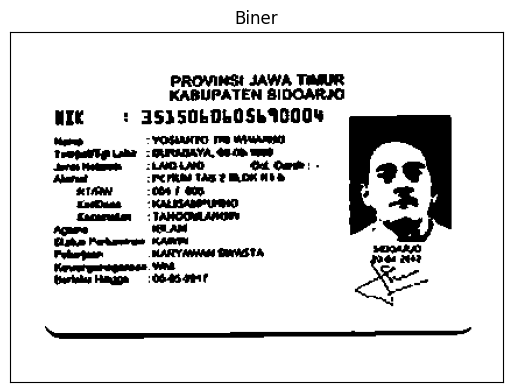

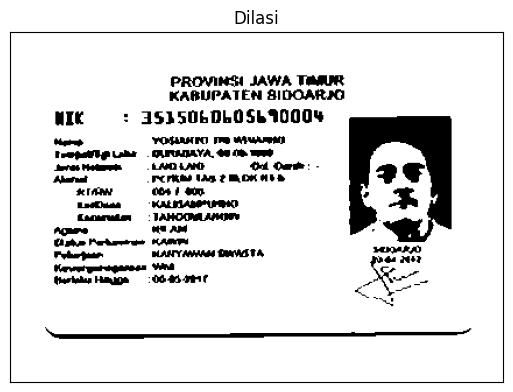

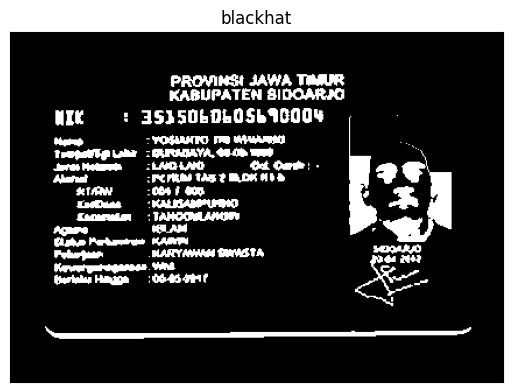

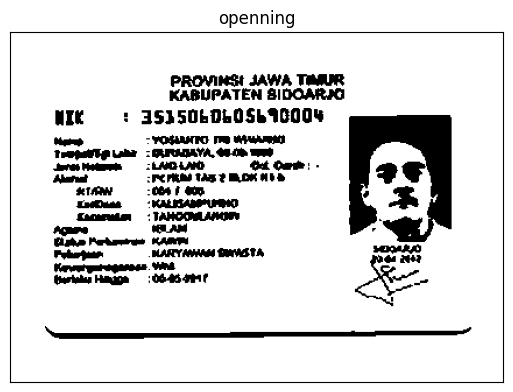

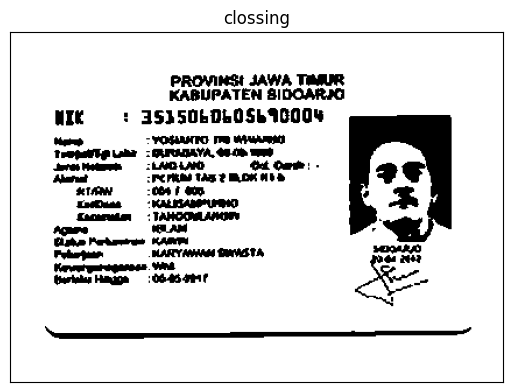

In [25]:
img = cv2.imread('/content/drive/MyDrive/KTP1_P7.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((1,1),np.uint8)
close = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel)
kernel = np.ones((2,1),np.uint8)
dilasi = cv2.dilate(binary,kernel,iterations = 1)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 17))
blackhat = cv2.morphologyEx(binary, cv2.MORPH_BLACKHAT, Kernel)
kernel = np.ones((1,1),np.uint8)
open = cv2.morphologyEx(binary,cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.title('Biner')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(dilasi,cmap = 'gray')
plt.title('Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(blackhat,cmap = 'gray')
plt.title('blackhat')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(open,cmap = 'gray')
plt.title('openning')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(close,cmap = 'gray')
plt.title('clossing')
plt.xticks([]), plt.yticks([])
plt.show()

**KTP 2**

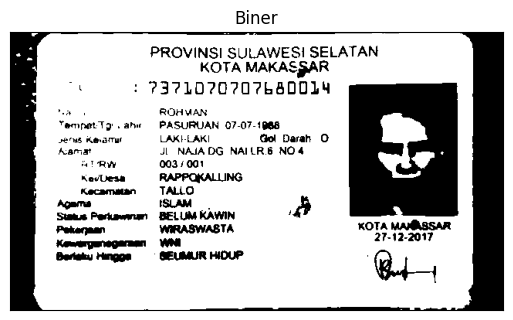

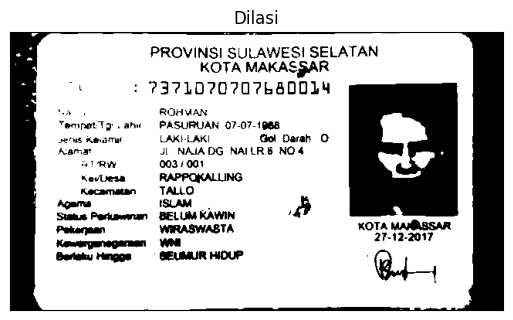

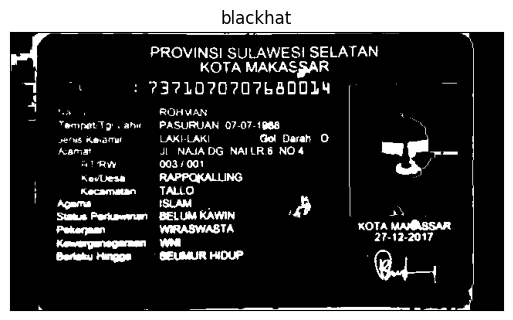

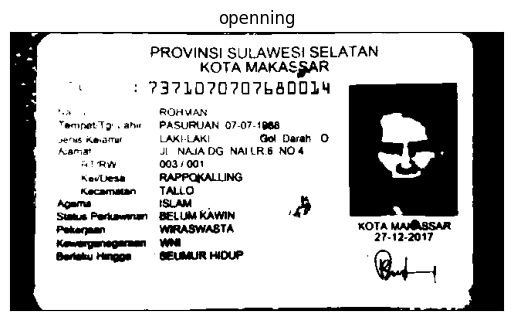

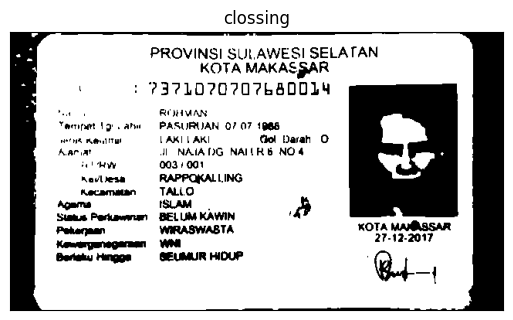

In [26]:
img = cv2.imread('/content/drive/MyDrive/KTP2_P2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((2,1),np.uint8)
close = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel)
kernel = np.ones((1,1),np.uint8)
dilasi = cv2.dilate(binary,kernel,iterations = 1)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 17))
blackhat = cv2.morphologyEx(binary, cv2.MORPH_BLACKHAT, Kernel)
kernel = np.ones((1,1),np.uint8)
open = cv2.morphologyEx(binary,cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.title('Biner')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(dilasi,cmap = 'gray')
plt.title('Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(blackhat,cmap = 'gray')
plt.title('blackhat')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(open,cmap = 'gray')
plt.title('openning')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(close,cmap = 'gray')
plt.title('clossing')
plt.xticks([]), plt.yticks([])
plt.show()

**KTP 3**

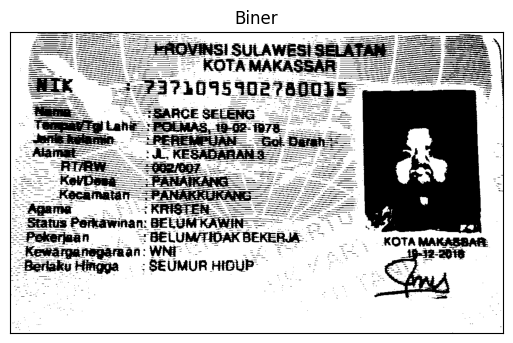

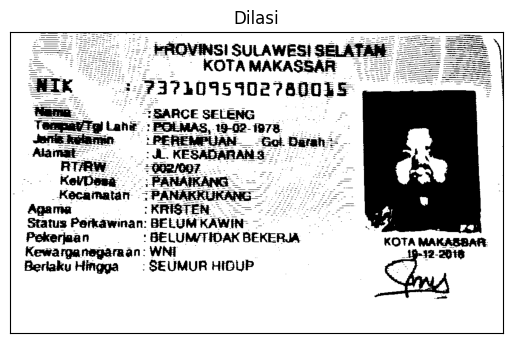

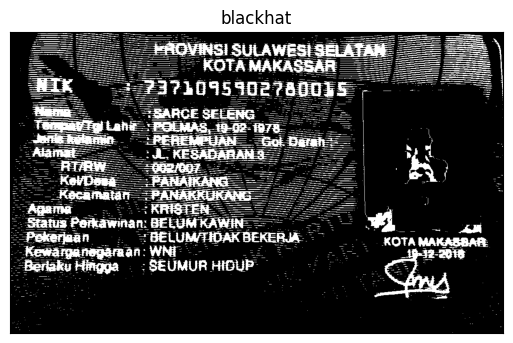

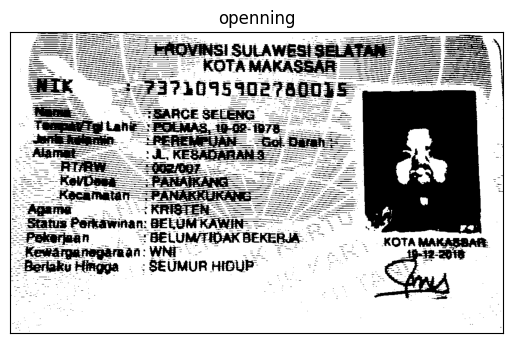

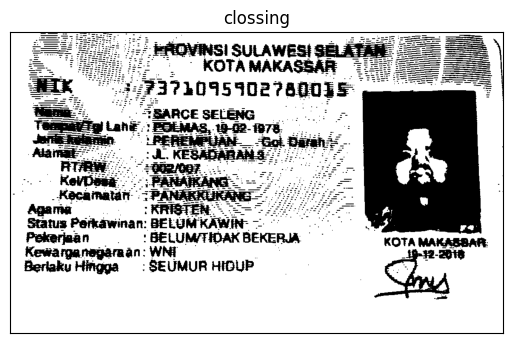

In [28]:
img = cv2.imread('/content/drive/MyDrive/KTP3_P7.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((2,1),np.uint8)
close = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel)
kernel = np.ones((2,1),np.uint8)
dilasi = cv2.dilate(binary,kernel,iterations = 1)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 17))
blackhat = cv2.morphologyEx(binary, cv2.MORPH_BLACKHAT, Kernel)
kernel = np.ones((2,1),np.uint8)
open = cv2.morphologyEx(binary,cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.title('Biner')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(dilasi,cmap = 'gray')
plt.title('Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(blackhat,cmap = 'gray')
plt.title('blackhat')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(open,cmap = 'gray')
plt.title('openning')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(close,cmap = 'gray')
plt.title('clossing')
plt.xticks([]), plt.yticks([])
plt.show()

**KTP 4**

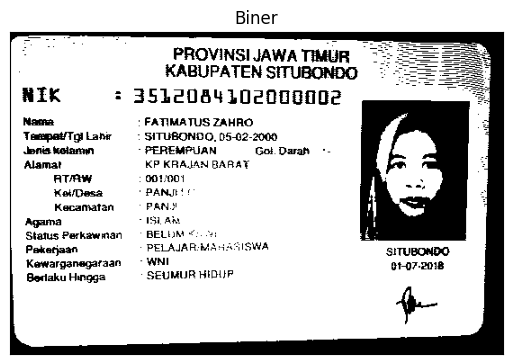

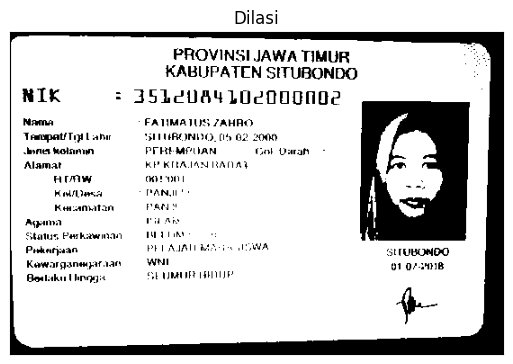

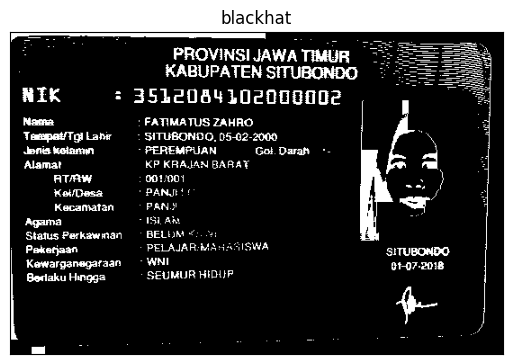

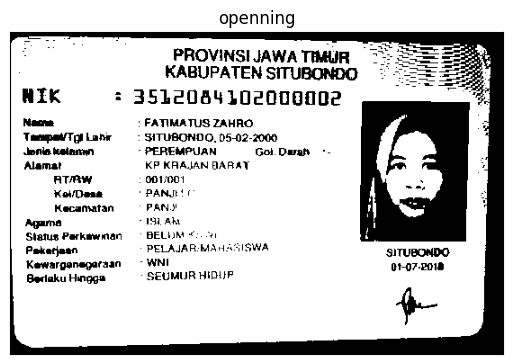

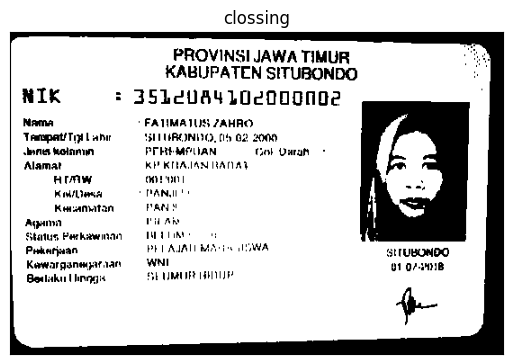

In [30]:
img = cv2.imread('/content/drive/MyDrive/KTP5_P7.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((2,1),np.uint8)
close = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel)
kernel = np.ones((2,1),np.uint8)
dilasi = cv2.dilate(binary,kernel,iterations = 1)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 17))
blackhat = cv2.morphologyEx(binary, cv2.MORPH_BLACKHAT, Kernel)
kernel = np.ones((2,1),np.uint8)
open = cv2.morphologyEx(binary,cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.title('Biner')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(dilasi,cmap = 'gray')
plt.title('Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(blackhat,cmap = 'gray')
plt.title('blackhat')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(open,cmap = 'gray')
plt.title('openning')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(close,cmap = 'gray')
plt.title('clossing')
plt.xticks([]), plt.yticks([])
plt.show()

**KTP 5**

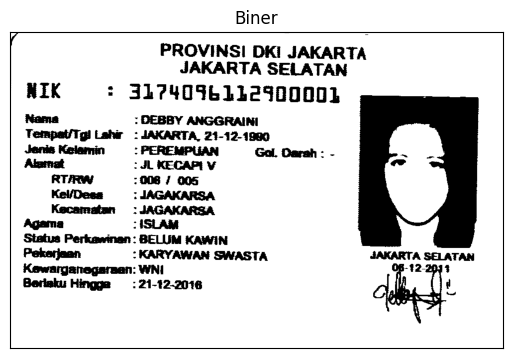

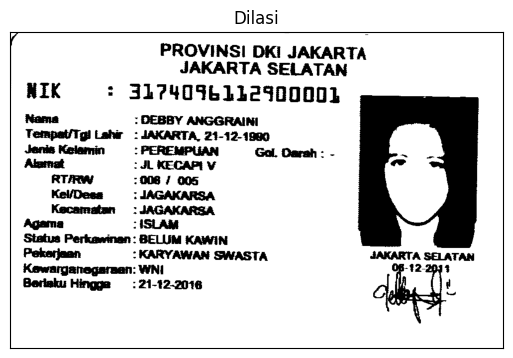

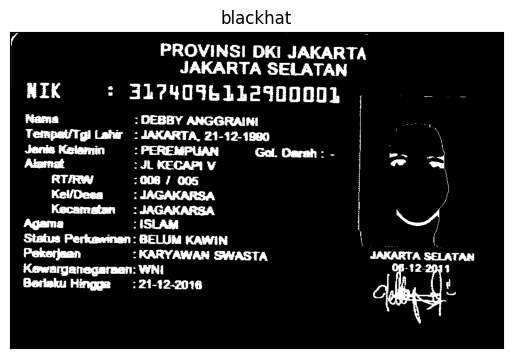

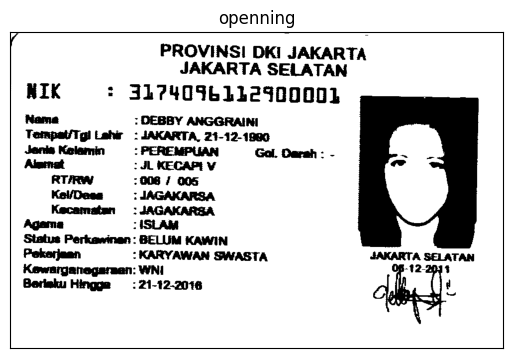

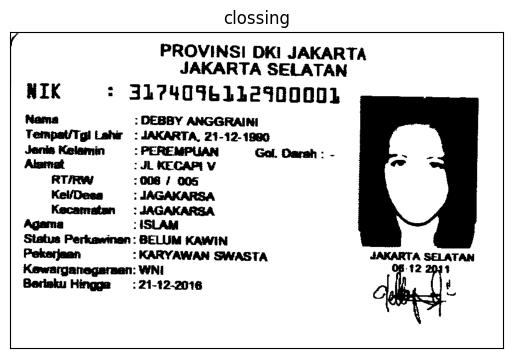

In [31]:
img = cv2.imread('/content/drive/MyDrive/KTP6_P7.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((2,1),np.uint8)
close = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel)
kernel = np.ones((1,1),np.uint8)
dilasi = cv2.dilate(binary,kernel,iterations = 1)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 17))
blackhat = cv2.morphologyEx(binary, cv2.MORPH_BLACKHAT, Kernel)
kernel = np.ones((2,1),np.uint8)
open = cv2.morphologyEx(binary,cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.title('Biner')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(dilasi,cmap = 'gray')
plt.title('Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(blackhat,cmap = 'gray')
plt.title('blackhat')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(open,cmap = 'gray')
plt.title('openning')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(close,cmap = 'gray')
plt.title('clossing')
plt.xticks([]), plt.yticks([])
plt.show()

**KTP 6**

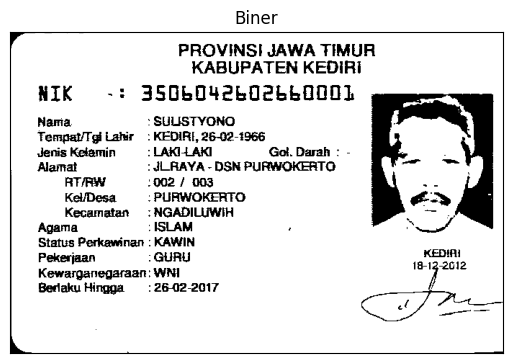

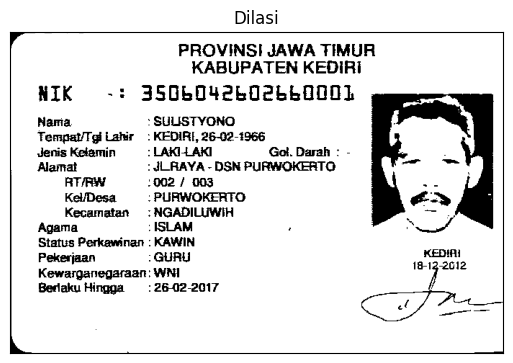

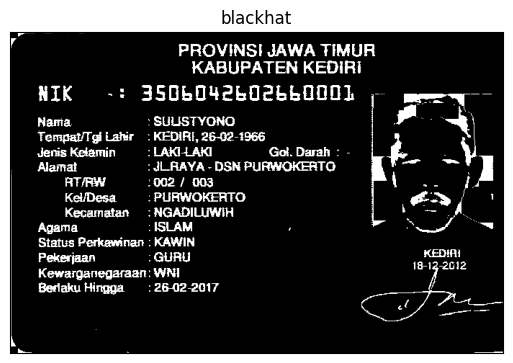

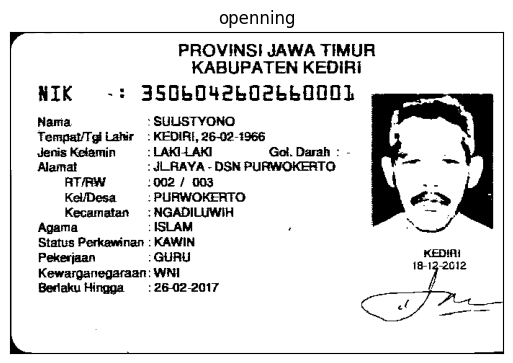

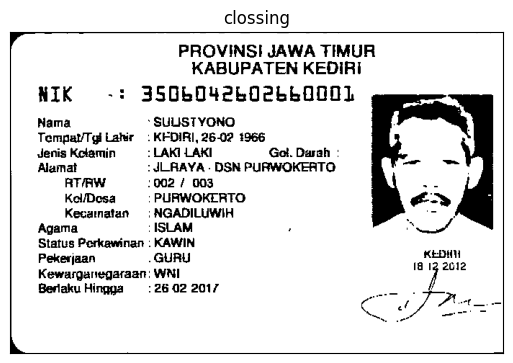

In [32]:
img = cv2.imread('/content/drive/MyDrive/KTP7_P7.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((2,1),np.uint8)
close = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel)
kernel = np.ones((1,1),np.uint8)
dilasi = cv2.dilate(binary,kernel,iterations = 1)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 17))
blackhat = cv2.morphologyEx(binary, cv2.MORPH_BLACKHAT, Kernel)
kernel = np.ones((1,1),np.uint8)
open = cv2.morphologyEx(binary,cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.title('Biner')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(dilasi,cmap = 'gray')
plt.title('Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(blackhat,cmap = 'gray')
plt.title('blackhat')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(open,cmap = 'gray')
plt.title('openning')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(close,cmap = 'gray')
plt.title('clossing')
plt.xticks([]), plt.yticks([])
plt.show()

**KTP 7**

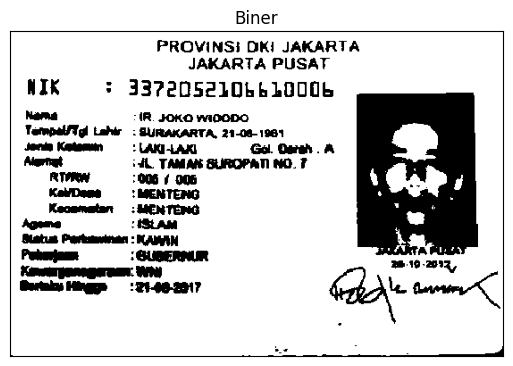

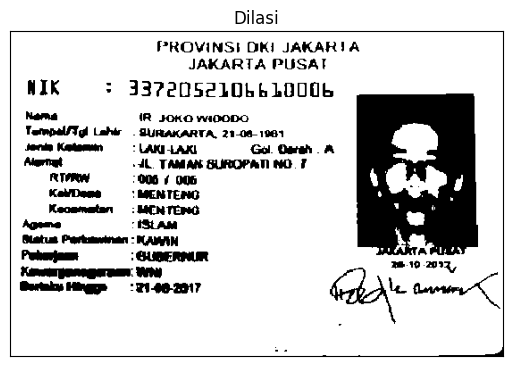

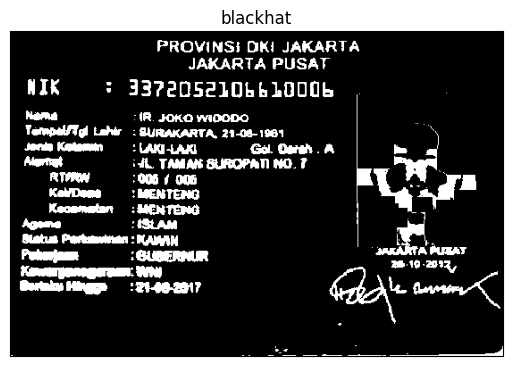

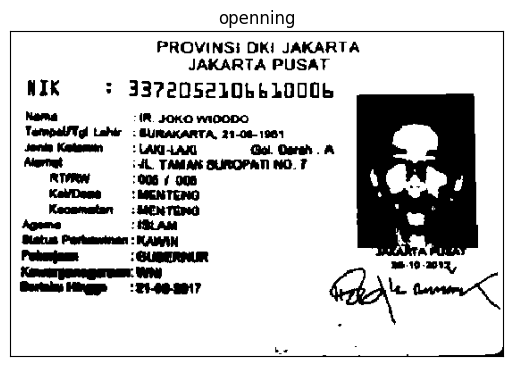

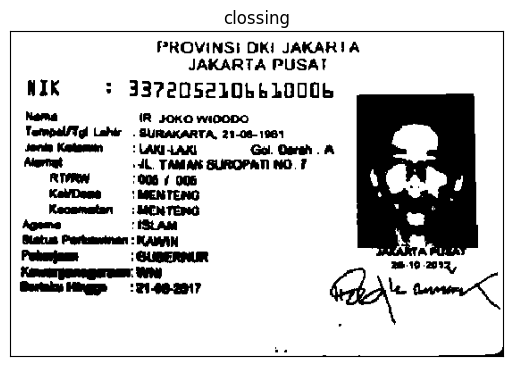

In [33]:
img = cv2.imread('/content/drive/MyDrive/KTP.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((2,1),np.uint8)
close = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel)
kernel = np.ones((2,1),np.uint8)
dilasi = cv2.dilate(binary,kernel,iterations = 1)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 17))
blackhat = cv2.morphologyEx(binary, cv2.MORPH_BLACKHAT, Kernel)
kernel = np.ones((2,1),np.uint8)
open = cv2.morphologyEx(binary,cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.title('Biner')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(dilasi,cmap = 'gray')
plt.title('Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(blackhat,cmap = 'gray')
plt.title('blackhat')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(open,cmap = 'gray')
plt.title('openning')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(close,cmap = 'gray')
plt.title('clossing')
plt.xticks([]), plt.yticks([])
plt.show()

**KTP 8**

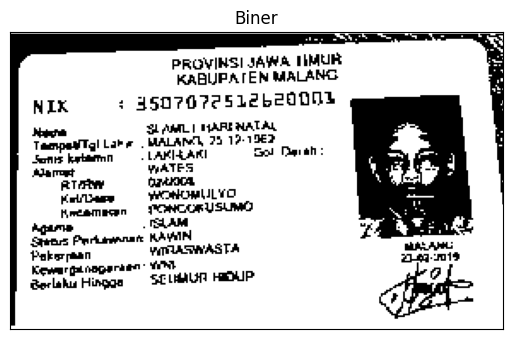

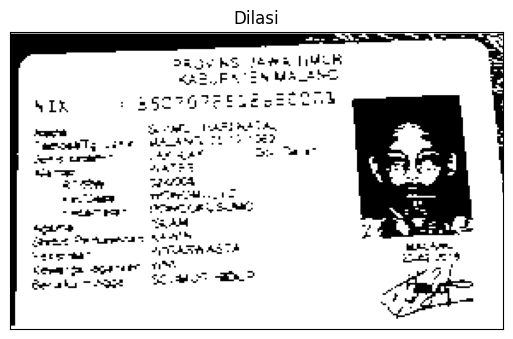

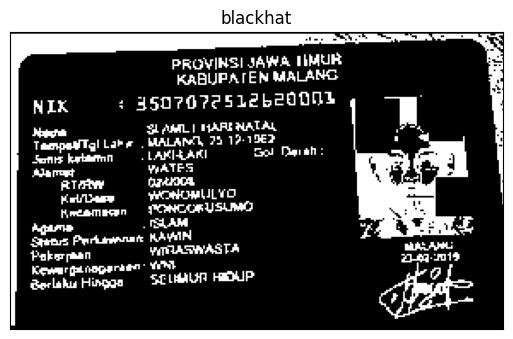

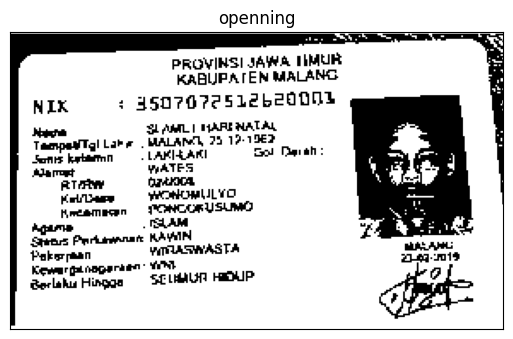

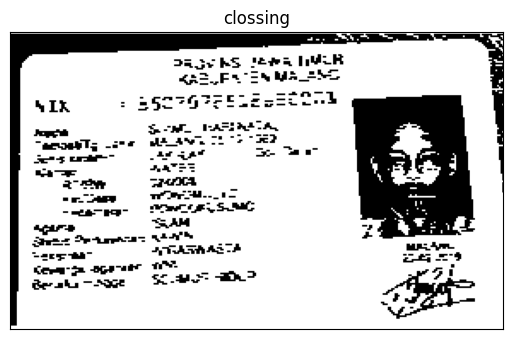

In [35]:
img = cv2.imread('/content/drive/MyDrive/KTP9.jfif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((1,2),np.uint8)
close = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel)
kernel = np.ones((1,2),np.uint8)
dilasi = cv2.dilate(binary,kernel,iterations = 1)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 17))
blackhat = cv2.morphologyEx(binary, cv2.MORPH_BLACKHAT, Kernel)
kernel = np.ones((1,),np.uint8)
open = cv2.morphologyEx(binary,cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.title('Biner')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(dilasi,cmap = 'gray')
plt.title('Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(blackhat,cmap = 'gray')
plt.title('blackhat')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(open,cmap = 'gray')
plt.title('openning')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(close,cmap = 'gray')
plt.title('clossing')
plt.xticks([]), plt.yticks([])
plt.show()

**KTP 9**

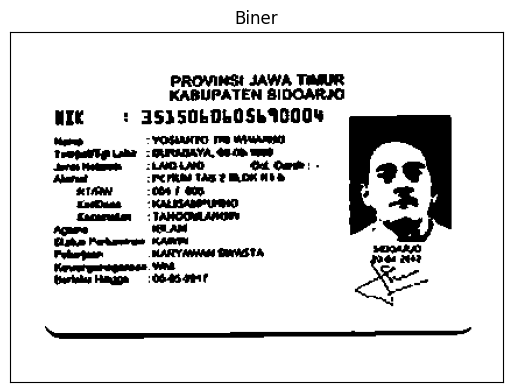

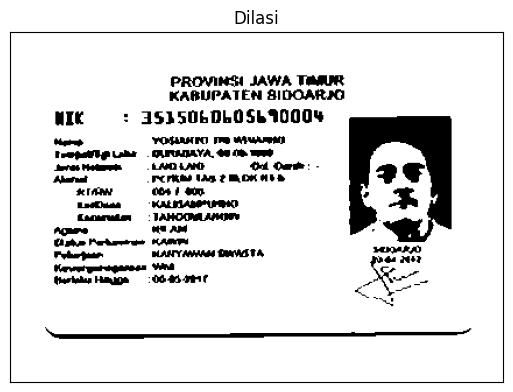

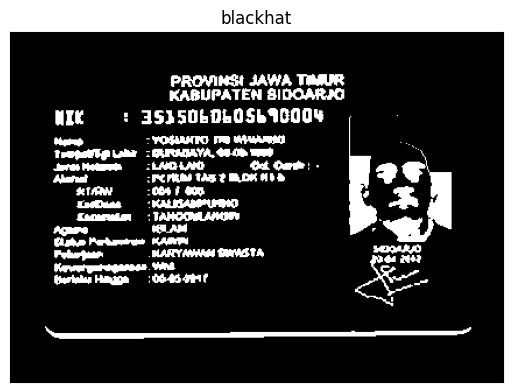

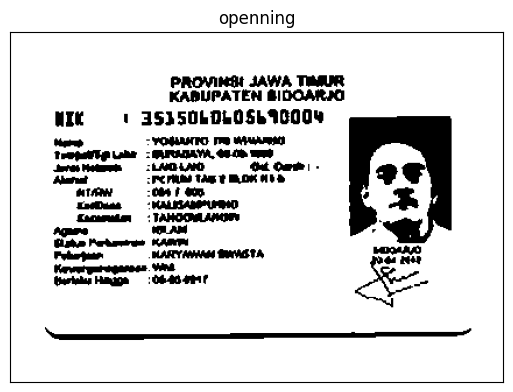

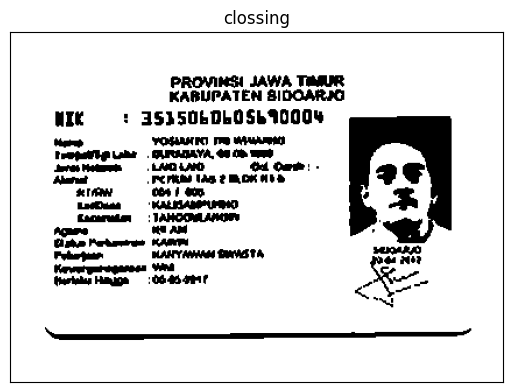

In [36]:
img = cv2.imread('/content/drive/MyDrive/KTP1_P7.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((2,1),np.uint8)
close = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel)
kernel = np.ones((2,1),np.uint8)
dilasi = cv2.dilate(binary,kernel,iterations = 1)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 17))
blackhat = cv2.morphologyEx(binary, cv2.MORPH_BLACKHAT, Kernel)
kernel = np.ones((2,1),np.uint8)
open = cv2.morphologyEx(binary,cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.title('Biner')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(dilasi,cmap = 'gray')
plt.title('Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(blackhat,cmap = 'gray')
plt.title('blackhat')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(open,cmap = 'gray')
plt.title('openning')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(close,cmap = 'gray')
plt.title('clossing')
plt.xticks([]), plt.yticks([])
plt.show()

**KTP 10**

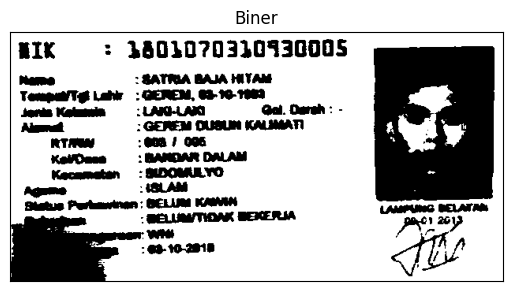

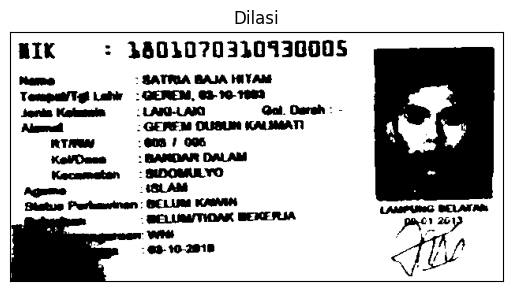

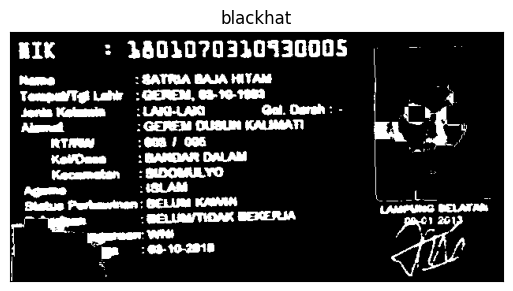

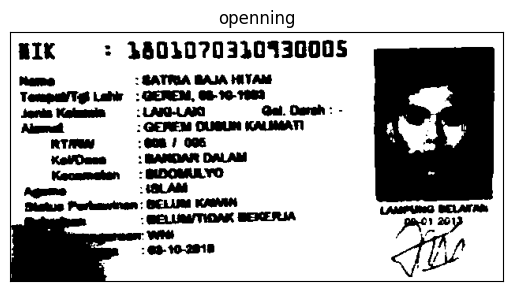

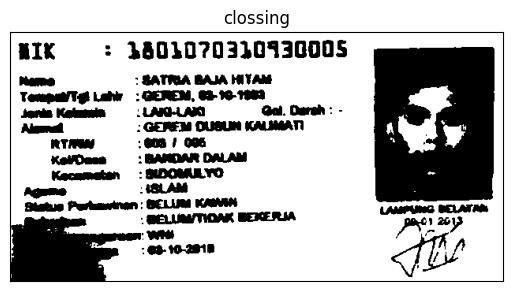

In [37]:
img = cv2.imread('/content/drive/MyDrive/KTP10.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((2,1),np.uint8)
close = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel)
kernel = np.ones((2,1),np.uint8)
dilasi = cv2.dilate(binary,kernel,iterations = 1)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 17))
blackhat = cv2.morphologyEx(binary, cv2.MORPH_BLACKHAT, Kernel)
kernel = np.ones((2,1),np.uint8)
open = cv2.morphologyEx(binary,cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.title('Biner')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(dilasi,cmap = 'gray')
plt.title('Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(blackhat,cmap = 'gray')
plt.title('blackhat')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(open,cmap = 'gray')
plt.title('openning')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(close,cmap = 'gray')
plt.title('clossing')
plt.xticks([]), plt.yticks([])
plt.show()